In [98]:
import sys
sys.path.append("../") # go to parent dir

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
from evrp_gdg.utils.utilities import create_optimal_edges, create_json_out, update_instance_json, read_instance_json_str, convert_txt_instances_to_csv
from evrp_gdg.utils.plot import plot_interactive_graph, plot_evrptwv2g
from evrp_gdg.milp.evrptw_gdp import EVRPTW

import pandas as pd
import numpy as np

import json

pd.options.plotting.backend = "plotly"

# Problem type options

Objective options: {Schneider} OR {OpEx CapEx Cycle EA DCM Delivery}

Constraint options: {Start=End FullStart=End NoXkappaBounds NoMinVehicles NoSymmetry NoXd}

Transformation methods: {Hull} OR {BigM}

In [100]:
# instance = 'r104C5'
# instance = 'r105C5'
# instance = 'r201C10'
# instance = 'rc108C10'
# instance = 'c103C15'
# instance = 'c202C15'
# instance = 'rc103C15'
# instance = 'r105C15'
# instance = 'r202C15'
# instance = 'r102C15'

instance = 'c103C5_'
# instance = 'c101C10_'

fpath = 'config/test_instances/' + instance + '.csv'

In [106]:
m = EVRPTW(problem_type='BigM Distance OpEx CapEx EA')
m.full_solve(fpath)

2021-04-23 00:57:53 INFO     Building abstract model
2021-04-23 00:57:53 INFO     Defining parameters and sets
2021-04-23 00:57:53 INFO     Defining variables
2021-04-23 00:57:53 INFO     Defining disjuncts and disjunction
2021-04-23 00:57:53 INFO     Importing EVRPTW MILP instance: c103C5_
2021-04-23 00:57:53 INFO     Reading CSV
2021-04-23 00:57:53 INFO     Creating graph
2021-04-23 00:57:53 INFO     Creating timeseries data
2021-04-23 00:57:53 INFO     Creating duplicates and extended graph
2021-04-23 00:57:53 INFO     Using Scipy euclidian distances to generate distance matrix
2021-04-23 00:57:53 INFO     Calculating distance matrix
2021-04-23 00:57:53 INFO     Creating parameters
2021-04-23 00:57:53 INFO     Creating instance
2021-04-23 00:57:54 INFO     Problem type: BigM Distance OpEx CapEx EA
2021-04-23 00:57:57 INFO     Solving instance...


Using license file C:\gurobi910\win64\gurobi.lic
Academic license - for non-commercial use only - expires 2021-06-13
Read LP format model from file C:\Users\berwa\AppData\Local\Temp\tmpp4r7zfmi.pyomo.lp
Reading time = 0.38 seconds
x2673: 9813 rows, 2673 columns, 219428 nonzeros
Changed value of parameter TimeLimit to 300.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 9813 rows, 2673 columns and 219428 nonzeros
Model fingerprint: 0x6b2253d8
Variable types: 648 continuous, 2025 integer (2025 binary)
Coefficient statistics:
  Matrix range     [3e-01, 3e+03]
  Objective range  [4e-01, 1e+03]
  Bounds range     [3e-01, 1e+03]
  RHS range        [3e-01, 2e+03]
Presolve removed 8394 rows and 1360 columns
Presolve time: 0.67s
Presolved: 1419 rows, 1313 columns, 8156 nonzeros
Variable types: 642 continuous, 671 integer (669 binary)

Root rela

2021-04-23 00:58:04 INFO     Done


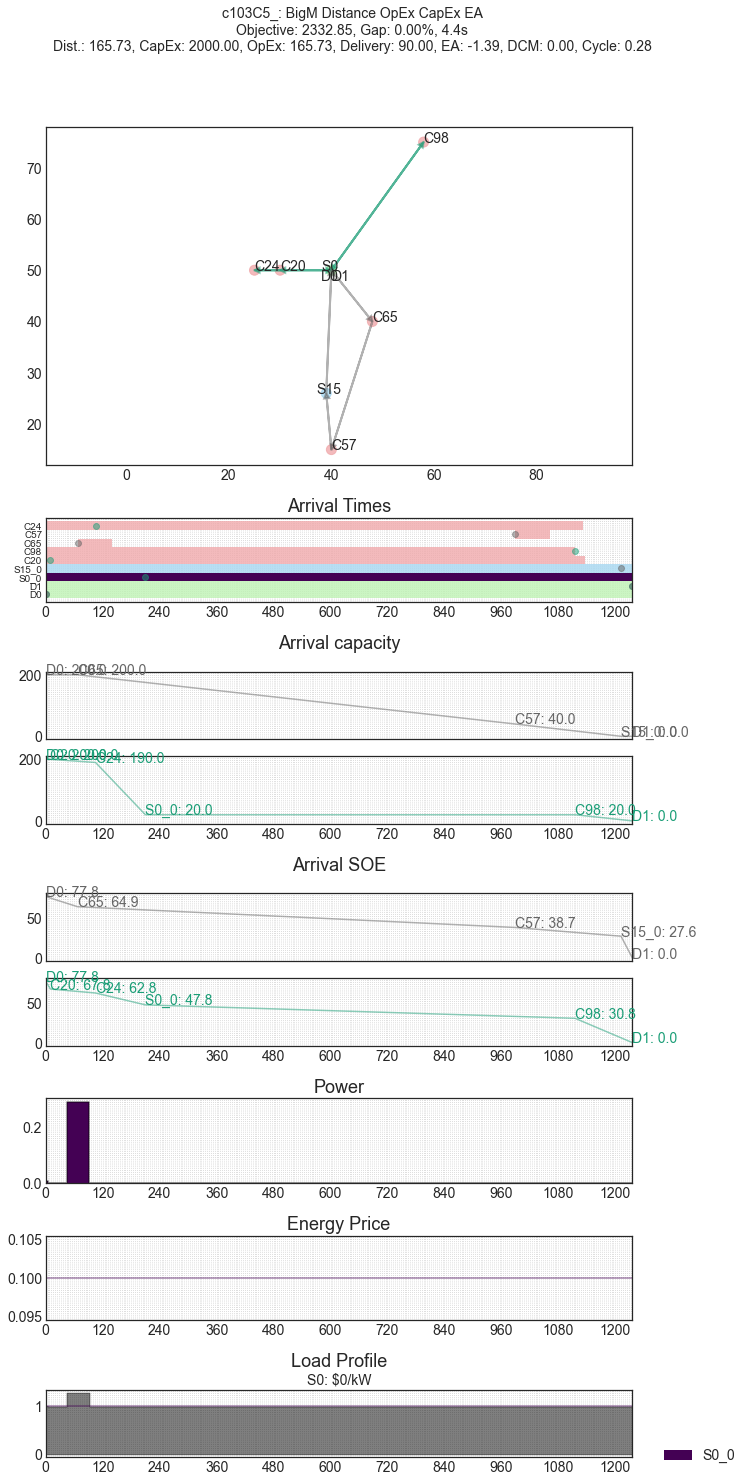

In [107]:
x, xp, traces, routes = plot_evrptwv2g(m, save=False)

In [17]:
# routes

In [103]:
x = getattr(m.instance, 'xgamma')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] == 1.0]
active_arcs

[(('D0', 'C20'), 1.0),
 (('D0', 'C65'), 1.0),
 (('S0_0', 'C98'), 1.0),
 (('S15_0', 'D1'), 1.0),
 (('C20', 'C24'), 1.0),
 (('C98', 'D1'), 1.0),
 (('C65', 'C57'), 1.0),
 (('C57', 'S15_0'), 1.0),
 (('C24', 'S0_0'), 1.0)]

In [104]:
x = getattr(m.instance, 'xkappa')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] == 1.0]
active_arcs

[(('S0_0', 0), 1.0),
 (('S0_0', 4), 1.0),
 (('S0_0', 8), 1.0),
 (('S0_0', 12), 1.0),
 (('S0_0', 16), 1.0),
 (('S0_0', 20), 1.0),
 (('S0_0', 24), 1.0),
 (('S0_0', 28), 1.0),
 (('S0_0', 32), 1.0),
 (('S0_0', 36), 1.0),
 (('S0_0', 40), 1.0),
 (('S0_0', 44), 1.0),
 (('S0_0', 48), 1.0),
 (('S0_0', 52), 1.0),
 (('S0_0', 56), 1.0),
 (('S0_0', 60), 1.0),
 (('S0_0', 64), 1.0),
 (('S0_0', 68), 1.0),
 (('S0_0', 72), 1.0),
 (('S0_0', 76), 1.0),
 (('S0_0', 80), 1.0),
 (('S0_0', 84), 1.0),
 (('S0_0', 88), 1.0)]

In [94]:
# m.instance.xw.pprint()

In [105]:
x = getattr(m.instance, 'xp')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] > 0]
active_arcs

[(('S0_0', 0), 0.0072085447493304144),
 (('S0_0', 44), 0.288184438),
 (('S0_0', 48), 0.288184438),
 (('S0_0', 52), 0.288184438),
 (('S0_0', 56), 0.288184438),
 (('S0_0', 60), 0.288184438),
 (('S0_0', 64), 0.288184438),
 (('S0_0', 68), 0.288184438),
 (('S0_0', 72), 0.288184438),
 (('S0_0', 76), 0.288184438),
 (('S0_0', 80), 0.288184438),
 (('S0_0', 84), 0.288184438),
 (('S0_0', 88), 0.288184438)]

In [70]:
m.instance.tB.pprint()

tB : Time window end time at node i
    Size=9, Index=V01_, Domain=Any, Default=None, Mutable=True
    Key   : Value
      C20 :  1136
      C24 :  1131
      C57 :  1063
      C65 :   139
      C98 :  1115
       D0 :  1236
       D1 :  1236
     S0_0 :  1236
    S15_0 :  1236


In [29]:
m.instance.ArcOn.pprint()

ArcOn : Size=64, Index=ArcOn_index, Active=True
    ArcOn[C20,C20] : Active=True
        1 Var Declarations
            indicator_var : Size=1, Index=None
                Key  : Lower : Value : Upper : Fixed : Stale : Domain
                None :     0 :  None :     1 : False :  True : Binary

        1 Declarations: indicator_var
    ArcOn[C20,C24] : Active=False
        1 Var Declarations
            indicator_var : Size=1, Index=None
                Key  : Lower : Value : Upper : Fixed : Stale : Domain
                None :     0 :   1.0 :     1 : False : False : Binary

        4 Constraint Declarations
            constraint_energy_customer : Energy transition for each EV while at customer node i and traveling across edge (i, j)
                Size=1, Index=None, Active=False
                Key  : Lower : Body                        : Upper : Active
                None :  -Inf : xa[C24] - (xa[C20] - r*5.0) :   0.0 :  False
            constraint_payload : Vehicles must unload

                Key  : Lower : Body                          : Upper : Active
                None :  -Inf : xq[S0_0] - (xq[C98] - q[C98]) :   0.0 :  False
            constraint_time_customer : Service time for each vehicle doing delivery at each customer node
                Size=1, Index=None, Active=False
                Key  : Lower : Body                                                                   : Upper : Active
                None :  -Inf : xw[C98] + (tS[C98] + 30.805843601498726/v + tQ[C98]*q[C98]) - xw[S0_0] :   0.0 :  False
            constraint_xgamma : Arc must be activated
                Size=1, Index=None, Active=False
                Key  : Lower : Body             : Upper : Active
                None :   1.0 : xgamma[C98,S0_0] :   1.0 :  False

        5 Declarations: indicator_var constraint_xgamma constraint_time_customer constraint_energy_customer constraint_payload
    ArcOn[C98,S15_0] : Active=False
        1 Var Declarations
            indicator_var :

                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

    ArcOn[S0_0,D1] : Active=False
        1 Var Declarations
            indicator_var : Size=1, Index=None
                Key  : Lower : Value : Upper : Fixed : Stale : Domain
                None :     0 :  -0.0 :     1 : False : False : Binary

        4 Constraint Declarations
            constraint_energy_station : Energy transition for each EV while at an intermediate charging station node i and traveling across edge (i, j)
                Size=1, Index=None, Active=False
                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

                Key  : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

    ArcOn[S15_0,S15_0] : Active=True
        1 Var Declarations
            indicator_var : Size=1, Index=None
                Key  : Lower : Value : Upper : Fixed : Stale : Domain
                None :     0 :  None :     1 : False :  True : Binary

        1 Declarations: indicator_var


In [15]:
m.instance.ArcOnThen_.pprint()

ArcOnThen_ : Size=3708, Index=ArcOnThen__index, Active=True
    Key                    : Body                                                                            : Active
        ('S0_0', 'C20', 0) :          ArcOnBool[S0_0,C20] --> EVDischargeBool[S0_0,0] ⊻ EVChargeBool[S0_0,0] :   True
        ('S0_0', 'C20', 4) :          ArcOnBool[S0_0,C20] --> EVDischargeBool[S0_0,4] ⊻ EVChargeBool[S0_0,4] :   True
        ('S0_0', 'C20', 8) :          ArcOnBool[S0_0,C20] --> EVDischargeBool[S0_0,8] ⊻ EVChargeBool[S0_0,8] :   True
       ('S0_0', 'C20', 12) :        ArcOnBool[S0_0,C20] --> EVDischargeBool[S0_0,12] ⊻ EVChargeBool[S0_0,12] :   True
       ('S0_0', 'C20', 16) :        ArcOnBool[S0_0,C20] --> EVDischargeBool[S0_0,16] ⊻ EVChargeBool[S0_0,16] :   True
       ('S0_0', 'C20', 20) :        ArcOnBool[S0_0,C20] --> EVDischargeBool[S0_0,20] ⊻ EVChargeBool[S0_0,20] :   True
       ('S0_0', 'C20', 24) :        ArcOnBool[S0_0,C20] --> EVDischargeBool[S0_0,24] ⊻ EVChargeBool[S0_0,24] :   T

       ('S0_0', 'D1', 456) :       ArcOnBool[S0_0,D1] --> EVDischargeBool[S0_0,456] ⊻ EVChargeBool[S0_0,456] :   True
       ('S0_0', 'D1', 460) :       ArcOnBool[S0_0,D1] --> EVDischargeBool[S0_0,460] ⊻ EVChargeBool[S0_0,460] :   True
       ('S0_0', 'D1', 464) :       ArcOnBool[S0_0,D1] --> EVDischargeBool[S0_0,464] ⊻ EVChargeBool[S0_0,464] :   True
       ('S0_0', 'D1', 468) :       ArcOnBool[S0_0,D1] --> EVDischargeBool[S0_0,468] ⊻ EVChargeBool[S0_0,468] :   True
       ('S0_0', 'D1', 472) :       ArcOnBool[S0_0,D1] --> EVDischargeBool[S0_0,472] ⊻ EVChargeBool[S0_0,472] :   True
       ('S0_0', 'D1', 476) :       ArcOnBool[S0_0,D1] --> EVDischargeBool[S0_0,476] ⊻ EVChargeBool[S0_0,476] :   True
       ('S0_0', 'D1', 480) :       ArcOnBool[S0_0,D1] --> EVDischargeBool[S0_0,480] ⊻ EVChargeBool[S0_0,480] :   True
       ('S0_0', 'D1', 484) :       ArcOnBool[S0_0,D1] --> EVDischargeBool[S0_0,484] ⊻ EVChargeBool[S0_0,484] :   True
       ('S0_0', 'D1', 488) :       ArcOnBool[S0_0,D1] --

      ('S15_0', 'C98', 40) :     ArcOnBool[S15_0,C98] --> EVDischargeBool[S15_0,40] ⊻ EVChargeBool[S15_0,40] :   True
      ('S15_0', 'C98', 44) :     ArcOnBool[S15_0,C98] --> EVDischargeBool[S15_0,44] ⊻ EVChargeBool[S15_0,44] :   True
      ('S15_0', 'C98', 48) :     ArcOnBool[S15_0,C98] --> EVDischargeBool[S15_0,48] ⊻ EVChargeBool[S15_0,48] :   True
      ('S15_0', 'C98', 52) :     ArcOnBool[S15_0,C98] --> EVDischargeBool[S15_0,52] ⊻ EVChargeBool[S15_0,52] :   True
      ('S15_0', 'C98', 56) :     ArcOnBool[S15_0,C98] --> EVDischargeBool[S15_0,56] ⊻ EVChargeBool[S15_0,56] :   True
      ('S15_0', 'C98', 60) :     ArcOnBool[S15_0,C98] --> EVDischargeBool[S15_0,60] ⊻ EVChargeBool[S15_0,60] :   True
      ('S15_0', 'C98', 64) :     ArcOnBool[S15_0,C98] --> EVDischargeBool[S15_0,64] ⊻ EVChargeBool[S15_0,64] :   True
      ('S15_0', 'C98', 68) :     ArcOnBool[S15_0,C98] --> EVDischargeBool[S15_0,68] ⊻ EVChargeBool[S15_0,68] :   True
      ('S15_0', 'C98', 72) :     ArcOnBool[S15_0,C98] --

In [49]:
m.instance.E.pprint()

E : Graph edges
    Size=1, Index=None, Ordered=Insertion
    Key  : Dimen : Domain   : Size : Members
    None :     2 : E_domain :   57 : {('D0', 'D1'), ('D0', 'S0_0'), ('D0', 'S15_0'), ('D0', 'C20'), ('D0', 'C98'), ('D0', 'C65'), ('D0', 'C57'), ('D0', 'C24'), ('S0_0', 'D1'), ('S0_0', 'S15_0'), ('S0_0', 'C20'), ('S0_0', 'C98'), ('S0_0', 'C65'), ('S0_0', 'C57'), ('S0_0', 'C24'), ('S15_0', 'D1'), ('S15_0', 'S0_0'), ('S15_0', 'C20'), ('S15_0', 'C98'), ('S15_0', 'C65'), ('S15_0', 'C57'), ('S15_0', 'C24'), ('C20', 'D1'), ('C20', 'S0_0'), ('C20', 'S15_0'), ('C20', 'C98'), ('C20', 'C65'), ('C20', 'C57'), ('C20', 'C24'), ('C98', 'D1'), ('C98', 'S0_0'), ('C98', 'S15_0'), ('C98', 'C20'), ('C98', 'C65'), ('C98', 'C57'), ('C98', 'C24'), ('C65', 'D1'), ('C65', 'S0_0'), ('C65', 'S15_0'), ('C65', 'C20'), ('C65', 'C98'), ('C65', 'C57'), ('C65', 'C24'), ('C57', 'D1'), ('C57', 'S0_0'), ('C57', 'S15_0'), ('C57', 'C20'), ('C57', 'C98'), ('C57', 'C65'), ('C57', 'C24'), ('C24', 'D1'), ('C24', 'S0_0'), ('C

In [59]:
for idx in m.instance.E:
    print(idx)
    if idx == ('D0', 'D1'):
        m.instance.ArcOn[idx].indicator_var.pprint()

('D0', 'D1')
indicator_var : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :  -0.0 :     1 : False : False : Binary
('D0', 'S0_0')
('D0', 'S15_0')
('D0', 'C20')
('D0', 'C98')
('D0', 'C65')
('D0', 'C57')
('D0', 'C24')
('S0_0', 'D1')
('S0_0', 'S15_0')
('S0_0', 'C20')
('S0_0', 'C98')
('S0_0', 'C65')
('S0_0', 'C57')
('S0_0', 'C24')
('S15_0', 'D1')
('S15_0', 'S0_0')
('S15_0', 'C20')
('S15_0', 'C98')
('S15_0', 'C65')
('S15_0', 'C57')
('S15_0', 'C24')
('C20', 'D1')
('C20', 'S0_0')
('C20', 'S15_0')
('C20', 'C98')
('C20', 'C65')
('C20', 'C57')
('C20', 'C24')
('C98', 'D1')
('C98', 'S0_0')
('C98', 'S15_0')
('C98', 'C20')
('C98', 'C65')
('C98', 'C57')
('C98', 'C24')
('C65', 'D1')
('C65', 'S0_0')
('C65', 'S15_0')
('C65', 'C20')
('C65', 'C98')
('C65', 'C57')
('C65', 'C24')
('C57', 'D1')
('C57', 'S0_0')
('C57', 'S15_0')
('C57', 'C20')
('C57', 'C98')
('C57', 'C65')
('C57', 'C24')
('C24', 'D1')
('C24', 'S0_0')
('C24', 'S15_0')
('C24', 'C20')
('C24', 'C98'

In [ ]:
m.instance.ArcOn

In [26]:
var_list = ['xgamma', 'xw', 'xq', 'xa']
x = merge_variable_results(m, var_list)
x[x['state']>0].sort_values(['route', 'xw'])

NameError: name 'merge_variable_results' is not defined

In [8]:
x = getattr(m.instance, 'xgamma')
# keys, values = zip(*x.get_values().items())
x_val = x.extract_values()
active_arcs = [n for n in list(x_val.items()) if n[1] == 1.0]
active_arcs

[(('D0', 'C1'), 1.0),
 (('D0', 'C5'), 1.0),
 (('S3', 'C71'), 1.0),
 (('C71', 'D1'), 1.0),
 (('C1', 'S3'), 1.0),
 (('C5', 'C99'), 1.0),
 (('C87', 'D1'), 1.0),
 (('C99', 'C87'), 1.0)]

In [101]:
# m.instance.constraint_energy_customer.pprint()

In [9]:
m.instance.ArcOn.pprint()

ArcOn : Size=81, Index=ArcOn_index, Active=True
    ArcOn[C1,C1] : Active=True
        1 Var Declarations
            indicator_var : Size=1, Index=None
                Key  : Lower : Value : Upper : Fixed : Stale : Domain
                None :     0 :  None :     1 : False :  True : Binary

        1 Declarations: indicator_var
    ArcOn[C1,C5] : Active=False
        1 Var Declarations
            indicator_var : Size=1, Index=None
                Key  : Lower : Value : Upper : Fixed : Stale : Domain
                None :     0 :  -0.0 :     1 : False : False : Binary

        5 Constraint Declarations
            constraint_energy_customer : Size=1, Index=None, Active=False
                Key  : Lower : Body   : Upper                       : Active
                None :   0.0 : xa[C5] : xa[C1] - 32.202484376209235 :  False
            constraint_node_time_window : Size=1, Index=None, Active=False
                Key  : Lower : Body   : Upper : Active
                None :  36.0 

                Key  : Lower : Body                       : Upper  : Active
                None :   0.0 : xw[C99] + 27.4928556845359 : xw[S0] :  False
            constraint_xgamma : Size=1, Index=None, Active=False
                Key  : Lower : Body           : Upper : Active
                None :   1.0 : xgamma[C99,S0] :   1.0 :  False

        6 Declarations: indicator_var constraint_xgamma constraint_node_time_window constraint_payload constraint_time_customer constraint_energy_customer
    ArcOn[C99,S3] : Active=False
        1 Var Declarations
            indicator_var : Size=1, Index=None
                Key  : Lower : Value : Upper : Fixed : Stale : Domain
                None :     0 :   0.0 :     1 : False : False : Binary

        5 Constraint Declarations
            constraint_energy_customer : Size=1, Index=None, Active=False
                Key  : Lower : Body   : Upper                       : Active
                None :   0.0 : xa[S3] : xa[C99] - 44.04543109109048 

In [29]:
m.instance.ArcOn['C71', 'C1'].pprint()

{Member of ArcOn} : Size=81, Index=ArcOn_index, Active=True
    ArcOn[C71,C1] : Active=False
        1 Var Declarations
            indicator_var : Size=1, Index=None
                Key  : Lower : Value : Upper : Fixed : Stale : Domain
                None :     0 :   1.0 :     1 : False : False : Binary

        5 Constraint Declarations
            constraint_energy_customer : Size=1, Index=None, Active=False
                Key  : Lower : Body   : Upper                        : Active
                None :   0.0 : xa[C1] : xa[C71] - 24.839484696748443 :  False
            constraint_node_time_window : Size=1, Index=None, Active=False
                Key  : Lower : Body    : Upper : Active
                None :   0.0 : xw[C71] : 180.0 :  False
            constraint_payload : Size=1, Index=None, Active=False
                Key  : Lower : Body   : Upper        : Active
                None :   0.0 : xq[C1] : xq[C71] - 15 :  False
            constraint_time_customer : Size=1, Inde

In [100]:
m.instance.pprint()

16 Set Declarations
    ArcOff_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain  : Size : Members
        None :     2 : V0_*V1_ :  441 : {('D0', 'D1'), ('D0', 'S0'), ('D0', 'S3'), ('D0', 'S7'), ('D0', 'S13'), ('D0', 'S15'), ('D0', 'C61'), ('D0', 'C30'), ('D0', 'C98'), ('D0', 'C59'), ('D0', 'C35'), ('D0', 'C13'), ('D0', 'C10'), ('D0', 'C44'), ('D0', 'C50'), ('D0', 'C95'), ('D0', 'C18'), ('D0', 'C33'), ('D0', 'C85'), ('D0', 'C19'), ('D0', 'C40'), ('S0', 'D1'), ('S0', 'S0'), ('S0', 'S3'), ('S0', 'S7'), ('S0', 'S13'), ('S0', 'S15'), ('S0', 'C61'), ('S0', 'C30'), ('S0', 'C98'), ('S0', 'C59'), ('S0', 'C35'), ('S0', 'C13'), ('S0', 'C10'), ('S0', 'C44'), ('S0', 'C50'), ('S0', 'C95'), ('S0', 'C18'), ('S0', 'C33'), ('S0', 'C85'), ('S0', 'C19'), ('S0', 'C40'), ('S3', 'D1'), ('S3', 'S0'), ('S3', 'S3'), ('S3', 'S7'), ('S3', 'S13'), ('S3', 'S15'), ('S3', 'C61'), ('S3', 'C30'), ('S3', 'C98'), ('S3', 'C59'), ('S3', 'C35'), ('S3', 'C13'), ('S3', 'C10'), ('S3', 'C44'), ('S3', 'C50

        Key  : Active : Sense    : Expression
        None :   True : minimize : 36.235341863986875*xgamma[S3,D1] + 38.07886552931954*xgamma[S7,D1] + 24.08318915758459*xgamma[S13,D1] + 24.020824298928627*xgamma[S15,D1] + 22.360679774997898*xgamma[C61,D1] + 20.615528128088304*xgamma[C30,D1] + 30.805843601498726*xgamma[C98,D1] + 35.05709628591621*xgamma[C59,D1] + 38.07886552931954*xgamma[C35,D1] + 30.805843601498726*xgamma[C13,D1] + 16.76305461424021*xgamma[C10,D1] + 21.540659228538015*xgamma[C44,D1] + 22.80350850198276*xgamma[C50,D1] + 37.20215047547655*xgamma[C95,D1] + 35.35533905932738*xgamma[C18,D1] + 33.52610922848042*xgamma[C33,D1] + 29.732137494637012*xgamma[C85,D1] + 39.05124837953327*xgamma[C19,D1] + 20.615528128088304*xgamma[C40,D1] + 36.235341863986875*xgamma[S3,S0] + 38.07886552931954*xgamma[S7,S0] + 24.08318915758459*xgamma[S13,S0] + 24.020824298928627*xgamma[S15,S0] + 22.360679774997898*xgamma[C61,S0] + 20.615528128088304*xgamma[C30,S0] + 30.805843601498726*xgamma[C98,S0] +

        Key : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    : Upper : Active
        C10 :   0.0 : xgamma[C10,D1] + xgamma[C10,S0] + xgamma[C10,S3] + xgamma[C10,S7] + xgamma[C10,S13] + xgamma[C10,S15] + xgamma[C10,C61] + xgamma[C10,C30] + xgamma[C10,C98] + xgamma[C10,C59] + xgamma[C10,C35] + xgamma[C10,C13] + xgamma[C10,C44]

                Key            : Lower : Body                                                         : Upper : Active
                ('C10', 'C13') :   1.0 : ArcOn[C10,C13].indicator_var + ArcOff[C10,C13].indicator_var :   1.0 :   True
                ('C10', 'C18') :   1.0 : ArcOn[C10,C18].indicator_var + ArcOff[C10,C18].indicator_var :   1.0 :   True
                ('C10', 'C19') :   1.0 : ArcOn[C10,C19].indicator_var + ArcOff[C10,C19].indicator_var :   1.0 :   True
                ('C10', 'C30') :   1.0 : ArcOn[C10,C30].indicator_var + ArcOff[C10,C30].indicator_var :   1.0 :   True
                ('C10', 'C33') :   1.0 : ArcOn[C10,C33].indicator_var + ArcOff[C10,C33].indicator_var :   1.0 :   True
                ('C10', 'C35') :   1.0 : ArcOn[C10,C35].indicator_var + ArcOff[C10,C35].indicator_var :   1.0 :   True
                ('C10', 'C40') :   1.0 : ArcOn[C10,C40].indicator_var + ArcOff[C10,C40].indicator_var :   1.0 :   True
                ('C10', 'C44') :   1.0 : ArcOn[C

                            1 SetOf Declarations
                                ArcOn[C10,C85].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOn[C10,C85].indicator_var_index ArcOn[C10,C85].indicator_var

                    6 Declarations: localVarReferences ArcOn[C10,C85].constraint_xgamma ArcOn[C10,C85].constraint_node_time_window ArcOn[C10,C85].constraint_payload ArcOn[C10,C85].constraint_time_customer ArcOn[C10,C85].constraint_energy_customer
                _pyomo_gdp_bigm_reformulation.relaxedDisjuncts[23] : Active=True
                    2 Constraint Declarations
                        ArcOff[C10,C85].constraint_node_time_window : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                              

                            Key : Lower : Body                                                 : Upper : Active
                             lb :   1.0 : xgamma[C13,C35] + (1 - ArcOn[C13,C35].indicator_var) :  +Inf :   True
                             ub :  -Inf :                                      xgamma[C13,C35] :   1.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOn[C13,C35].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[50].localVarReferences.ArcOn[C13,C35].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   0.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOn[C13,C35].indicator_var_index : Dimen=1, Size=1, 

                            Key : Lower  : Body                                                 : Upper  : Active
                             lb : 1042.0 : xw[C13] + 1042.0*(1 - ArcOff[C13,S13].indicator_var) :   +Inf :   True
                             ub :   -Inf :  xw[C13] - 130.0*(1 - ArcOff[C13,S13].indicator_var) : 1106.0 :   True
                        ArcOff[C13,S13].constraint_xgamma : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                  : Upper : Active
                             lb :   0.0 :                                       xgamma[C13,S13] :  +Inf :   True
                             ub :  -Inf : xgamma[C13,S13] - (1 - ArcOff[C13,S13].indicator_var) :   0.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                               

                    2 Constraint Declarations
                        ArcOff[C18,C61].constraint_node_time_window : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                : Upper  : Active
                             lb :   0.0 :                                             xw[C18] :   +Inf :   True
                             ub :  -Inf : xw[C18] - 126.0*(1 - ArcOff[C18,C61].indicator_var) : 1110.0 :   True
                        ArcOff[C18,C61].constraint_xgamma : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                  : Upper : Active
                             lb :   0.0 :                                       xgamma[C18,C61] :  +Inf :   True
                             ub :  -Inf : xgamma[C18,C61] - (1 - ArcOff[C18,C61].indicator_var) :   0.0 :   True

                    1 Bl

                                ArcOff[C19,C35].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[131].localVarReferences.ArcOff[C19,C35].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   1.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOff[C19,C35].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOff[C19,C35].indicator_var_index ArcOff[C19,C35].indicator_var

                    3 Declarations: localVarReferences ArcOff[C19,C35].constraint_xgamma ArcOff[C19,C35].constraint_node_time_window
                _pyomo_gdp_bigm_reformulation.relaxedDisjuncts[132] : Active=True
              

                             lb :   0.0 :                                       xgamma[C30,C10] :  +Inf :   True
                             ub :  -Inf : xgamma[C30,C10] - (1 - ArcOff[C30,C10].indicator_var) :   0.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOff[C30,C10].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[161].localVarReferences.ArcOff[C30,C10].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   1.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOff[C30,C10].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                         


                            2 Declarations: ArcOn[C30,S0].indicator_var_index ArcOn[C30,S0].indicator_var

                    6 Declarations: localVarReferences ArcOn[C30,S0].constraint_xgamma ArcOn[C30,S0].constraint_node_time_window ArcOn[C30,S0].constraint_payload ArcOn[C30,S0].constraint_time_customer ArcOn[C30,S0].constraint_energy_customer
                _pyomo_gdp_bigm_reformulation.relaxedDisjuncts[191] : Active=True
                    2 Constraint Declarations
                        ArcOff[C30,S0].constraint_node_time_window : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                               : Upper  : Active
                             lb :   0.0 :                                            xw[C30] :   +Inf :   True
                             ub :  -Inf : xw[C30] - 111.0*(1 - ArcOff[C30,S0].indicator_var) : 1125.0 :   True
                        ArcOff[C30,S0].constraint_xgamma :

                            Key : Lower : Body                                                                                   : Upper : Active
                             lb :   0.0 :                                                                                xq[C50] :  +Inf :   True
                             ub :  -Inf : xq[C50] - (200.0 - (xq[C33] - 40))*(1 - ArcOn[C33,C50].indicator_var) - (xq[C33] - 40) :   0.0 :   True
                        ArcOn[C33,C50].constraint_time_customer : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                                                                      : Upper : Active
                             lb :   0.0 :                        xw[C33] + 109.6977156035922 - 109.6977156035922*(1 - ArcOn[C33,C50].indicator_var) :  +Inf :   True
                             ub :  -Inf : xw[C33] + 109.6977156035922 - (1345.6977156035923 - xw[C50])*(

                            Key : Lower : Body                                                : Upper : Active
                             lb : 655.0 : xw[C35] + 655.0*(1 - ArcOff[C35,C13].indicator_var) :  +Inf :   True
                             ub :  -Inf : xw[C35] - 511.0*(1 - ArcOff[C35,C13].indicator_var) : 725.0 :   True
                        ArcOff[C35,C13].constraint_xgamma : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                  : Upper : Active
                             lb :   0.0 :                                       xgamma[C35,C13] :  +Inf :   True
                             ub :  -Inf : xgamma[C35,C13] - (1 - ArcOff[C35,C13].indicator_var) :   0.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOff[C

                             ub :  -Inf :                                      xgamma[C35,S13] :   1.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOn[C35,S13].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[272].localVarReferences.ArcOn[C35,S13].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   1.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOn[C35,S13].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOn[C35,S13].indica

                            Key : Lower : Body                                                 : Upper : Active
                             lb : 143.0 :  xw[C40] + 143.0*(1 - ArcOff[C40,C44].indicator_var) :  +Inf :   True
                             ub :  -Inf : xw[C40] - 1037.0*(1 - ArcOff[C40,C44].indicator_var) : 199.0 :   True
                        ArcOff[C40,C44].constraint_xgamma : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                  : Upper : Active
                             lb :   0.0 :                                       xgamma[C40,C44] :  +Inf :   True
                             ub :  -Inf : xgamma[C40,C44] - (1 - ArcOff[C40,C44].indicator_var) :   0.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOf

                            Key : Lower : Body                                                : Upper  : Active
                             lb :   0.0 :                                             xw[C44] :   +Inf :   True
                             ub :  -Inf : xw[C44] - 112.0*(1 - ArcOff[C44,C10].indicator_var) : 1124.0 :   True
                        ArcOff[C44,C10].constraint_xgamma : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                  : Upper : Active
                             lb :   0.0 :                                       xgamma[C44,C10] :  +Inf :   True
                             ub :  -Inf : xgamma[C44,C10] - (1 - ArcOff[C44,C10].indicator_var) :   0.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOf

                            Key : Lower : Body                                                  : Upper : Active
                             lb :   0.0 :                                       xgamma[C44,C98] :  +Inf :   True
                             ub :  -Inf : xgamma[C44,C98] - (1 - ArcOff[C44,C98].indicator_var) :   0.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOff[C44,C98].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[347].localVarReferences.ArcOff[C44,C98].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   1.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOff[C44,C98].indicator_var_index : Dimen=1, S

                    2 Constraint Declarations
                        ArcOff[C50,C40].constraint_node_time_window : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                : Upper  : Active
                             lb :   0.0 :                                             xw[C50] :   +Inf :   True
                             ub :  -Inf : xw[C50] - 113.0*(1 - ArcOff[C50,C40].indicator_var) : 1123.0 :   True
                        ArcOff[C50,C40].constraint_xgamma : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                  : Upper : Active
                             lb :   0.0 :                                       xgamma[C50,C40] :  +Inf :   True
                             ub :  -Inf : xgamma[C50,C40] - (1 - ArcOff[C50,C40].indicator_var) :   0.0 :   True

                    1 Bl

                            Key : Lower : Body                                                 : Upper : Active
                             lb :   1.0 : xgamma[C59,C18] + (1 - ArcOn[C59,C18].indicator_var) :  +Inf :   True
                             ub :  -Inf :                                      xgamma[C59,C18] :   1.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOn[C59,C18].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[404].localVarReferences.ArcOn[C59,C18].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   0.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOn[C59,C18].indicator_var_index : Dimen=1, Size=1,

                            Key : Lower : Body                                                                                   : Upper : Active
                             lb :   0.0 :                                                                                xq[S13] :  +Inf :   True
                             ub :  -Inf : xq[S13] - (200.0 - (xq[C59] - 10))*(1 - ArcOn[C59,S13].indicator_var) - (xq[C59] - 10) :   0.0 :   True
                        ArcOn[C59,S13].constraint_time_customer : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                                                                       : Upper : Active
                             lb :   0.0 :                       xw[C59] + 114.83948469674844 - 114.83948469674844*(1 - ArcOn[C59,S13].indicator_var) :  +Inf :   True
                             ub :  -Inf : xw[C59] + 114.83948469674844 - (1350.8394846967485 - xw[S13]

                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOff[C61,C50].indicator_var_index ArcOff[C61,C50].indicator_var

                    3 Declarations: localVarReferences ArcOff[C61,C50].constraint_xgamma ArcOff[C61,C50].constraint_node_time_window
                _pyomo_gdp_bigm_reformulation.relaxedDisjuncts[460] : Active=True
                    5 Constraint Declarations
                        ArcOn[C61,C59].constraint_energy_customer : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                                                                                   : Upper : Active
                             lb :   0.0 :                                                                                                                xa[C59] :  +Inf :   True
                             ub :  -Inf : xa[C59] - (77.75 - (xa[

                                ArcOn[C85,C19].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[486].localVarReferences.ArcOn[C85,C19].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   0.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOn[C85,C19].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOn[C85,C19].indicator_var_index ArcOn[C85,C19].indicator_var

                    6 Declarations: localVarReferences ArcOn[C85,C19].constraint_xgamma ArcOn[C85,C19].constraint_node_time_window ArcOn[C85,C19].constraint_payload ArcOn[C85,C19].constraint_time_customer ArcOn[C85,C19].constraint_ene

                            1 SetOf Declarations
                                ArcOff[C85,S0].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOff[C85,S0].indicator_var_index ArcOff[C85,S0].indicator_var

                    3 Declarations: localVarReferences ArcOff[C85,S0].constraint_xgamma ArcOff[C85,S0].constraint_node_time_window
                _pyomo_gdp_bigm_reformulation.relaxedDisjuncts[512] : Active=True
                    5 Constraint Declarations
                        ArcOn[C85,S13].constraint_energy_customer : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                                                                                   : Upper : Active
                             lb

                            1 Var Declarations
                                ArcOff[C95,C44].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[537].localVarReferences.ArcOff[C95,C44].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   1.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOff[C95,C44].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOff[C95,C44].indicator_var_index ArcOff[C95,C44].indicator_var

                    3 Declarations: localVarReferences ArcOff[C95,C44].constraint_xgamma ArcOff[C95,C44].constraint_node_time_window
                _pyomo_gdp_bigm_reformulation.rel

                            Key : Lower : Body                                                                              : Upper : Active
                             lb :   0.0 :                        xw[C98] + 133.0 - 133.0*(1 - ArcOn[C98,C18].indicator_var) :  +Inf :   True
                             ub :  -Inf : xw[C98] + 133.0 - (1369.0 - xw[C18])*(1 - ArcOn[C98,C18].indicator_var) - xw[C18] :   0.0 :   True
                        ArcOn[C98,C18].constraint_xgamma : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                 : Upper : Active
                             lb :   1.0 : xgamma[C98,C18] + (1 - ArcOn[C98,C18].indicator_var) :  +Inf :   True
                             ub :  -Inf :                                      xgamma[C98,C18] :   1.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
 

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOn[C98,S0].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[590].localVarReferences.ArcOn[C98,S0].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :  -0.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOn[C98,S0].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOn[C98,S0].indicator_var_index ArcOn[C98,S0].indicator_var

                    6 Declarations: localVarReferences ArcOn[C98,S0].const

                                ArcOff[D0,C50].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[619].localVarReferences.ArcOff[D0,C50].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   1.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOff[D0,C50].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOff[D0,C50].indicator_var_index ArcOff[D0,C50].indicator_var

                    3 Declarations: localVarReferences ArcOff[D0,C50].constraint_xgamma ArcOff[D0,C50].constraint_node_time_window
                _pyomo_gdp_bigm_reformulation.relaxedDisjuncts[620] : Active=True
                    5

                             lb :   0.0 : xw[S0] :   +Inf :   True
                             ub :  -Inf : xw[S0] : 1236.0 :   True
                        ArcOff[S0,C30].constraint_xgamma : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                : Upper : Active
                             lb :   0.0 :                                      xgamma[S0,C30] :  +Inf :   True
                             ub :  -Inf : xgamma[S0,C30] - (1 - ArcOff[S0,C30].indicator_var) :   0.0 :   True

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOff[S0,C30].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[651].localVarReferences.ArcOff[S0,C30].indicator_var_index
                                    Key  : Lower : Value : Uppe

                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   1.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOff[S0,S3].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOff[S0,S3].indicator_var_index ArcOff[S0,S3].indicator_var

                    3 Declarations: localVarReferences ArcOff[S0,S3].constraint_xgamma ArcOff[S0,S3].constraint_node_time_window
                _pyomo_gdp_bigm_reformulation.relaxedDisjuncts[680] : Active=True
                    5 Constraint Declarations
                        ArcOn[S0,S7].constraint_energy_station : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lo

                    1 Block Declarations
                        localVarReferences : Size=1, Index=None, Active=True
                            1 Var Declarations
                                ArcOn[S13,C95].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[708].localVarReferences.ArcOn[S13,C95].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :  -0.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOn[S13,C95].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOn[S13,C95].indicator_var_index ArcOn[S13,C95].indicator_var

                    6 Declarations: localVarReferences ArcOn[S13,C95]

                            Key : Lower : Body                                                           : Upper             : Active
                             lb :   0.0 :                                                        xa[C40] :              +Inf :   True
                             ub :  -Inf : xa[C40] - 5.656854249492383*(1 - ArcOn[S15,C40].indicator_var) : 72.09314575050762 :   True
                        ArcOn[S15,C40].constraint_node_time_window : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body    : Upper  : Active
                             lb :   0.0 : xw[S15] :   +Inf :   True
                             ub :  -Inf : xw[S15] : 1236.0 :   True
                        ArcOn[S15,C40].constraint_payload : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                                     : Upper : Active
         

                _pyomo_gdp_bigm_reformulation.relaxedDisjuncts[765] : Active=True
                    2 Constraint Declarations
                        ArcOff[S3,C13].constraint_node_time_window : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body   : Upper  : Active
                             lb :   0.0 : xw[S3] :   +Inf :   True
                             ub :  -Inf : xw[S3] : 1236.0 :   True
                        ArcOff[S3,C13].constraint_xgamma : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                : Upper : Active
                             lb :   0.0 :                                      xgamma[S3,C13] :  +Inf :   True
                             ub :  -Inf : xgamma[S3,C13] - (1 - ArcOff[S3,C13].indicator_var) :   0.0 :   True

                    1 Block Declarations
                        localVarReferences :

                        ArcOn[S3,C98].constraint_energy_station : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body                                                           : Upper             : Active
                             lb :   0.0 :                                                        xa[C98] :              +Inf :   True
                             ub :  -Inf : xa[C98] - 7.0710678118654755*(1 - ArcOn[S3,C98].indicator_var) : 70.67893218813452 :   True
                        ArcOn[S3,C98].constraint_node_time_window : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                            Key : Lower : Body   : Upper  : Active
                             lb :   0.0 : xw[S3] :   +Inf :   True
                             ub :  -Inf : xw[S3] : 1236.0 :   True
                        ArcOn[S3,C98].constraint_payload : Size=2, Index=_pyomo_gdp_bigm_reformulation.lbub, Active=True
                  

                                ArcOff[S7,C40].indicator_var : Size=1, Index=_pyomo_gdp_bigm_reformulation.relaxedDisjuncts[817].localVarReferences.ArcOff[S7,C40].indicator_var_index
                                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                                    None :     0 :   1.0 :     1 : False : False : Binary

                            1 SetOf Declarations
                                ArcOff[S7,C40].indicator_var_index : Dimen=1, Size=1, Bounds=(None, None)
                                    Key  : Ordered : Members
                                    None :   False : UnindexedComponent_set

                            2 Declarations: ArcOff[S7,C40].indicator_var_index ArcOff[S7,C40].indicator_var

                    3 Declarations: localVarReferences ArcOff[S7,C40].constraint_xgamma ArcOff[S7,C40].constraint_node_time_window
                _pyomo_gdp_bigm_reformulation.relaxedDisjuncts[818] : Active=True
                    5

         ('D0', 'C13') :  None : False :  True
         ('D0', 'C18') :  None : False :  True
         ('D0', 'C19') :  None : False :  True
         ('D0', 'C30') :  None : False :  True
         ('D0', 'C33') :  None : False :  True
         ('D0', 'C35') :  None : False :  True
         ('D0', 'C40') :  None : False :  True
         ('D0', 'C44') :  None : False :  True
         ('D0', 'C50') :  None : False :  True
         ('D0', 'C59') :  None : False :  True
         ('D0', 'C61') :  None : False :  True
         ('D0', 'C85') :  None : False :  True
         ('D0', 'C95') :  None : False :  True
         ('D0', 'C98') :  None : False :  True
          ('D0', 'D0') :  None : False :  True
          ('D0', 'D1') :  None : False :  True
          ('D0', 'S0') :  None : False :  True
         ('D0', 'S13') :  None : False :  True
         ('D0', 'S15') :  None : False :  True
          ('D0', 'S3') :  None : False :  True
          ('D0', 'S7') :  None : False :  True
         ('D1

                    Key  : Lower  : Body    : Upper  : Active
                    None : 1042.0 : xw[C13] : 1106.0 :  False
                constraint_xgamma : Size=1, Index=None, Active=False
                    Key  : Lower : Body            : Upper : Active
                    None :   0.0 : xgamma[C13,C61] :   0.0 :  False

            3 Declarations: indicator_var constraint_xgamma constraint_node_time_window
        ArcOff[C13,C85] : Active=False
            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :   1.0 :     1 : False : False : Binary

            2 Constraint Declarations
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower  : Body    : Upper  : Active
                    None : 1042.0 : xw[C13] : 1106.0 :  False
                constraint_xgamma : Size=1, Index=None, Active=False
  

                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :   1.0 :     1 : False : False : Binary

            2 Constraint Declarations
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper : Active
                    None : 355.0 : xw[C33] : 437.0 :  False
                constraint_xgamma : Size=1, Index=None, Active=False
                    Key  : Lower : Body            : Upper : Active
                    None :   0.0 : xgamma[C33,C95] :   0.0 :  False

            3 Declarations: indicator_var constraint_xgamma constraint_node_time_window
        ArcOff[C33,C98] : Active=False
            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :   1.0 :     1 : False : False : Binary

            2 Constraint Declarations
            


            2 Constraint Declarations
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper  : Active
                    None :   0.0 : xw[C50] : 1123.0 :  False
                constraint_xgamma : Size=1, Index=None, Active=False
                    Key  : Lower : Body            : Upper : Active
                    None :   0.0 : xgamma[C50,C13] :   0.0 :  False

            3 Declarations: indicator_var constraint_xgamma constraint_node_time_window
        ArcOff[C50,C18] : Active=False
            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :   1.0 :     1 : False : False : Binary

            2 Constraint Declarations
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper  : Active
                  

        ArcOff[C85,C61] : Active=False
            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :   1.0 :     1 : False : False : Binary

            2 Constraint Declarations
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper  : Active
                    None :   0.0 : xw[C85] : 1116.0 :  False
                constraint_xgamma : Size=1, Index=None, Active=False
                    Key  : Lower : Body            : Upper : Active
                    None :   0.0 : xgamma[C85,C61] :   0.0 :  False

            3 Declarations: indicator_var constraint_xgamma constraint_node_time_window
        ArcOff[C85,C85] : Active=True
            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
   

                    Key  : Lower : Body           : Upper : Active
                    None :   0.0 : xgamma[S0,C50] :   0.0 :  False

            3 Declarations: indicator_var constraint_xgamma constraint_node_time_window
        ArcOff[S0,C59] : Active=False
            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :   1.0 :     1 : False : False : Binary

            2 Constraint Declarations
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body   : Upper  : Active
                    None :   0.0 : xw[S0] : 1236.0 :  False
                constraint_xgamma : Size=1, Index=None, Active=False
                    Key  : Lower : Body           : Upper : Active
                    None :   0.0 : xgamma[S0,C59] :   0.0 :  False

            3 Declarations: indicator_var constraint_xgamma constra

                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body   : Upper  : Active
                    None :   0.0 : xw[S7] : 1236.0 :  False
                constraint_xgamma : Size=1, Index=None, Active=False
                    Key  : Lower : Body           : Upper : Active
                    None :   0.0 : xgamma[S7,C35] :   0.0 :  False

            3 Declarations: indicator_var constraint_xgamma constraint_node_time_window
        ArcOff[S7,C40] : Active=False
            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :   1.0 :     1 : False : False : Binary

            2 Constraint Declarations
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body   : Upper  : Active
                    None :   0.0 : xw[S7] : 1236.0 :  False
   

            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :   0.0 :     1 : False : False : Binary

            5 Constraint Declarations
                constraint_energy_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body   : Upper                      : Active
                    None :   0.0 : xa[S3] : xa[C13] - 35.6931365951495 :  False
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower  : Body    : Upper  : Active
                    None : 1042.0 : xw[C13] : 1106.0 :  False
                constraint_payload : Size=1, Index=None, Active=False
                    Key  : Lower : Body   : Upper        : Active
                    None :   0.0 : xq[S3] : xq[C13] - 30 :  False
                constraint_time_customer : Size=1, Index=None, Active=False
            

            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :  -0.0 :     1 : False : False : Binary

            5 Constraint Declarations
                constraint_energy_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper                        : Active
                    None :   0.0 : xa[C10] : xa[C30] - 18.601075237738275 :  False
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper  : Active
                    None :   0.0 : xw[C30] : 1125.0 :  False
                constraint_payload : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper        : Active
                    None :   0.0 : xq[C10] : xq[C30] - 10 :  False
                constraint_time_customer : Size=1, Index=None, Active=False
      

            5 Constraint Declarations
                constraint_energy_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper                       : Active
                    None :   0.0 : xa[C13] : xa[C35] - 43.46262762420146 :  False
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper : Active
                    None : 655.0 : xw[C35] : 725.0 :  False
                constraint_payload : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper        : Active
                    None :   0.0 : xq[C13] : xq[C35] - 10 :  False
                constraint_time_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body                         : Upper   : Active
                    None :   0.0 : xw[C35] + 133.46262762420145 : xw[C13] :  False
                constraint_xgamma : Size=1, Index=None, Active=False
      

                    Key  : Lower : Body    : Upper        : Active
                    None :   0.0 : xq[C95] : xq[C40] - 10 :  False
                constraint_time_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body                         : Upper   : Active
                    None :   0.0 : xw[C40] + 146.82429058070147 : xw[C95] :  False
                constraint_xgamma : Size=1, Index=None, Active=False
                    Key  : Lower : Body            : Upper : Active
                    None :   1.0 : xgamma[C40,C95] :   1.0 :  False

            6 Declarations: indicator_var constraint_xgamma constraint_node_time_window constraint_payload constraint_time_customer constraint_energy_customer
        ArcOn[C40,C98] : Active=False
            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :  -0.0 :     1 : False : False 

                    None :     0 :  -0.0 :     1 : False : False : Binary

            5 Constraint Declarations
                constraint_energy_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body   : Upper                       : Active
                    None :   0.0 : xa[S7] : xa[C44] - 54.12947441089743 :  False
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper  : Active
                    None :   0.0 : xw[C44] : 1124.0 :  False
                constraint_payload : Size=1, Index=None, Active=False
                    Key  : Lower : Body   : Upper        : Active
                    None :   0.0 : xq[S7] : xq[C44] - 10 :  False
                constraint_time_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body                         : Upper  : Active
                    None :   0.0 : xw[C44] + 144.12947441089744 : xw[S7] :  False
    

                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :  -0.0 :     1 : False : False : Binary

            5 Constraint Declarations
                constraint_energy_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper                        : Active
                    None :   0.0 : xa[S15] : xa[C59] - 11.045361017187261 :  False
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper : Active
                    None :  66.0 : xw[C59] : 124.0 :  False
                constraint_payload : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper        : Active
                    None :   0.0 : xq[S15] : xq[C59] - 10 :  False
                constraint_time_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body                         : Upper   : Active
       

            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :  -0.0 :     1 : False : False : Binary

            5 Constraint Declarations
                constraint_energy_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper                        : Active
                    None :   0.0 : xa[S13] : xa[C85] - 52.839379254491625 :  False
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper  : Active
                    None :   0.0 : xw[C85] : 1116.0 :  False
                constraint_payload : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper        : Active
                    None :   0.0 : xq[S13] : xq[C85] - 30 :  False
                constraint_time_customer : Size=1, Index=None, Active=False
      


            6 Declarations: indicator_var constraint_xgamma constraint_node_time_window constraint_payload constraint_time_customer constraint_energy_customer
        ArcOn[C98,S0] : Active=False
            1 Var Declarations
                indicator_var : Size=1, Index=None
                    Key  : Lower : Value : Upper : Fixed : Stale : Domain
                    None :     0 :  -0.0 :     1 : False : False : Binary

            5 Constraint Declarations
                constraint_energy_customer : Size=1, Index=None, Active=False
                    Key  : Lower : Body   : Upper                        : Active
                    None :   0.0 : xa[S0] : xa[C98] - 30.805843601498726 :  False
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper  : Active
                    None :   0.0 : xw[C98] : 1115.0 :  False
                constraint_payload : Size=1, Index=None, Active=False
                    K

            5 Constraint Declarations
                constraint_energy_station : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper             : Active
                    None :   0.0 : xa[C98] : 46.94415639850128 :  False
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body   : Upper  : Active
                    None :   0.0 : xw[S0] : 1236.0 :  False
                constraint_payload : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper  : Active
                    None :   0.0 : xq[C98] : xq[S0] :  False
                constraint_time_station : Size=1, Index=None, Active=False
                    Key  : Lower : Body                                                : Upper   : Active
                    None :   0.0 : xw[S0] + 30.805843601498726 + 3.47*(77.75 - xa[S0]) : xw[C98] :  False
                constraint_xgamma : Size=1, Index=None, Active=

                    Key  : Lower : Body    : Upper             : Active
                    None :   0.0 : xa[C19] : 35.70240791674272 :  False
                constraint_node_time_window : Size=1, Index=None, Active=False
                    Key  : Lower : Body   : Upper  : Active
                    None :   0.0 : xw[S3] : 1236.0 :  False
                constraint_payload : Size=1, Index=None, Active=False
                    Key  : Lower : Body    : Upper  : Active
                    None :   0.0 : xq[C19] : xq[S3] :  False
                constraint_time_station : Size=1, Index=None, Active=False
                    Key  : Lower : Body                                               : Upper   : Active
                    None :   0.0 : xw[S3] + 42.04759208325728 + 3.47*(77.75 - xa[S3]) : xw[C19] :  False
                constraint_xgamma : Size=1, Index=None, Active=False
                    Key  : Lower : Body           : Upper : Active
                    None :   1.0 : xgamma[S3

        Key            : Disjuncts                             : Active : XOR
        ('C10', 'C13') : ['ArcOn[C10,C13]', 'ArcOff[C10,C13]'] :  False : True
        ('C10', 'C18') : ['ArcOn[C10,C18]', 'ArcOff[C10,C18]'] :  False : True
        ('C10', 'C19') : ['ArcOn[C10,C19]', 'ArcOff[C10,C19]'] :  False : True
        ('C10', 'C30') : ['ArcOn[C10,C30]', 'ArcOff[C10,C30]'] :  False : True
        ('C10', 'C33') : ['ArcOn[C10,C33]', 'ArcOff[C10,C33]'] :  False : True
        ('C10', 'C35') : ['ArcOn[C10,C35]', 'ArcOff[C10,C35]'] :  False : True
        ('C10', 'C40') : ['ArcOn[C10,C40]', 'ArcOff[C10,C40]'] :  False : True
        ('C10', 'C44') : ['ArcOn[C10,C44]', 'ArcOff[C10,C44]'] :  False : True
        ('C10', 'C50') : ['ArcOn[C10,C50]', 'ArcOff[C10,C50]'] :  False : True
        ('C10', 'C59') : ['ArcOn[C10,C59]', 'ArcOff[C10,C59]'] :  False : True
        ('C10', 'C61') : ['ArcOn[C10,C61]', 'ArcOff[C10,C61]'] :  False : True
        ('C10', 'C85') : ['ArcOn[C10,C85]', 'ArcOff[C